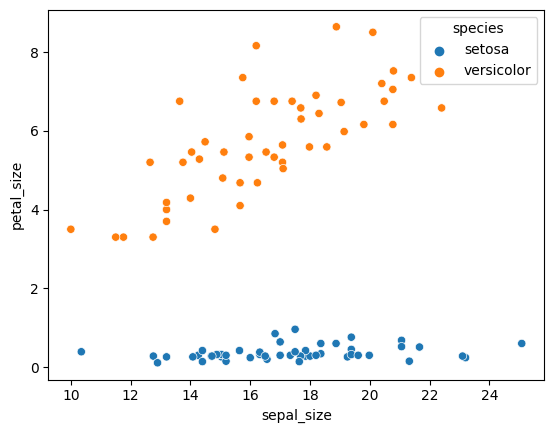

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

iris = sns.load_dataset('iris')

iris = iris[iris['species'] != 'virginica']

iris['sepal_size'] = iris['sepal_length'] * iris['sepal_width']
iris['petal_size'] = iris['petal_length'] * iris['petal_width']

df = iris.drop(columns=['petal_length', 'sepal_length', 'petal_width', 'sepal_width'],axis = 1)

pontos_df = [(row['sepal_size'], row['petal_size']) for _, row in df.iterrows()]


sns.scatterplot(data=iris, x='sepal_size', y='petal_size', hue='species')

plt.show()

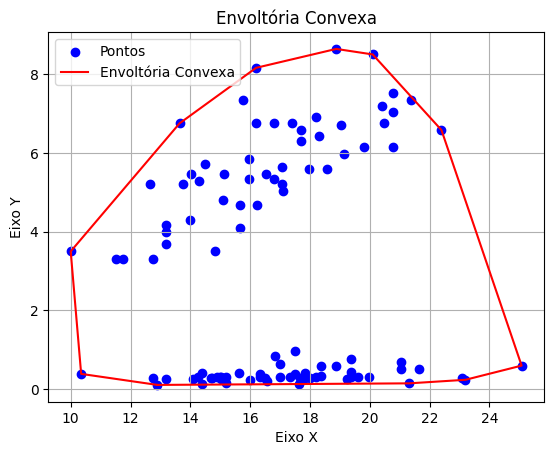

In [4]:
import matplotlib.pyplot as plt
import random
import math

# Função para calcular a orientação dos pontos
def orientacao(p, q, r):
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0:
        return 0  # Colinear
    return 1 if val > 0 else 2  # Horário ou anti-horário

# Função para encontrar o ponto mais baixo (e mais à esquerda)
def ponto_mais_baixo(pontos):
    o_ponto_mais_baixo = pontos[0]
    for ponto in pontos:
        if ponto[1] < o_ponto_mais_baixo[1] or (ponto[1] == o_ponto_mais_baixo[1] and ponto[0] < o_ponto_mais_baixo[0]):
            o_ponto_mais_baixo = ponto
    return o_ponto_mais_baixo

# Função para ordenar pontos angularmente a partir do ponto mais baixo
def ordenar_pontos_angularmente(pontos):
    o_ponto_mais_baixo = ponto_mais_baixo(pontos)
    return sorted(pontos, key=lambda ponto: (math.atan2(ponto[1] - o_ponto_mais_baixo[1], ponto[0] - o_ponto_mais_baixo[0]), ponto))

# Função para calcular a envoltória convexa
def envoltoria_convexa(pontos):
    n = len(pontos)
    if n < 3:
        return None  # Não é possível calcular a envoltória convexa com menos de 3 pontos

    pontos_ordenados = ordenar_pontos_angularmente(pontos)
    envoltoria = [pontos_ordenados[0], pontos_ordenados[1]]

    for i in range(2, n):
        while len(envoltoria) > 1 and orientacao(envoltoria[-2], envoltoria[-1], pontos_ordenados[i]) != 2:
            envoltoria.pop()
        envoltoria.append(pontos_ordenados[i])

    return envoltoria


# Calcular a envoltória convexa
envoltoria = envoltoria_convexa(pontos_df)

# Plotar os pontos e a envoltória convexa
x, y = zip(*pontos_df)
env_x, env_y = zip(*envoltoria)

plt.scatter(x, y, c='b', marker='o', label='Pontos')
plt.plot(env_x + (env_x[0],), env_y + (env_y[0],), linestyle='-', color='r', label='Envoltória Convexa')
plt.legend()
plt.title('Envoltória Convexa')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.grid(True)
plt.show()


In [5]:
x, y = df.shape
tipo1 = []
tipo2 = []
for i in range (0,x):
    if df['species'][i] == "setosa":
        tipo1.append(((df["petal_size"][i]+5), df["sepal_size"][i]))
    else:
        tipo2.append((df["petal_size"][i], df["sepal_size"][i]))


<Axes: xlabel='sepal_size', ylabel='petal_size'>

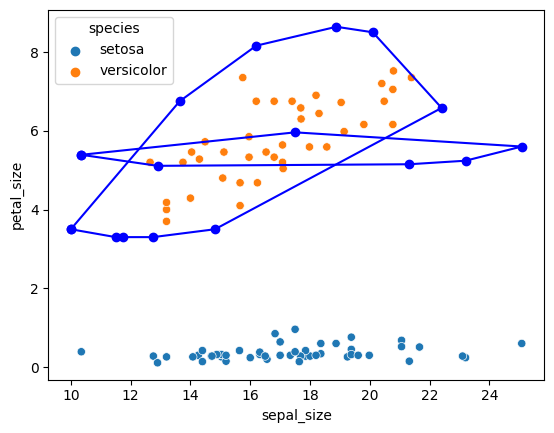

In [6]:
envoltoria11 = envoltoria_convexa(tipo1)
envoltoria22= envoltoria_convexa(tipo2)


y, x = zip(*envoltoria11)

# Criar um gráfico e plotar os pontos
plt.plot(x + (x[0],), y + (y[0],), linestyle='-', marker='o', color='b')

d, c = zip(*envoltoria22)

# Criar um gráfico e plotar os pontos
plt.plot(c + (c[0],), d + (d[0],), linestyle='-', marker='o', color='b')
sns.scatterplot(data=iris, x='sepal_size', y='petal_size', hue='species')



In [50]:
def proximo_segmento(pontos, indice):
    if indice < len(pontos) - 1:
        ponto_atual = pontos[indice]
        proximo_ponto = pontos[indice + 1]
        segmento = (ponto_atual, proximo_ponto)
        return segmento
    else:
        return None  # Não há próximo ponto para o último ponto

segmentos_envoltoria = []
segmentos_envoltoria.append((envoltoria11[0],(envoltoria11[len(envoltoria11)-1])))
for i in range(0,len(envoltoria11)-1):
    segmentos_envoltoria.append(proximo_segmento(envoltoria11,i))

segmentos_envoltoria

[((5.39, 10.35), (5.11, 12.899999999999999)),
 ((5.39, 10.35), (5.96, 17.5)),
 ((5.96, 17.5), (5.6, 25.080000000000002)),
 ((5.6, 25.080000000000002), (5.24, 23.2)),
 ((5.24, 23.2), (5.15, 21.32)),
 ((5.15, 21.32), (5.11, 12.899999999999999))]

((5.39, 10.35), (5.11, 12.899999999999999))